
Проект: Статестический анализ данных 

Цель проекта: Проанализировать требуемые данные и проверить некоторые гипотезы.

#### Шаг 1. Загрузка данных


In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from math import factorial
from scipy import stats as st

In [4]:
users_go = pd.read_csv('//datasets/users_go.csv')
rides_go = pd.read_csv('/datasets/rides_go.csv')
subscriptions_go = pd.read_csv('/datasets/subscriptions_go.csv')

In [5]:
users_go.head()

,user_id,name,age,city,subscription_type
0,1,Кира,22,Тюмень,ultra
1,2,Станислав,31,Омск,ultra
2,3,Алексей,20,Москва,ultra
3,4,Константин,26,Ростов-на-Дону,ultra
4,5,Адель,28,Омск,ultra


In [6]:
rides_go.head()

,user_id,distance,duration,date
0,1,4409.919140,25.599769,2021-01-01
1,1,2617.592153,15.816871,2021-01-18
2,1,754.159807,6.232113,2021-04-20
3,1,2694.783254,18.511000,2021-08-11
4,1,4028.687306,26.265803,2021-08-28


In [7]:
subscriptions_go.head()

,subscription_type,minute_price,start_ride_price,subscription_fee
0,free,8,50,0
1,ultra,6,0,199


In [8]:
users_go.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1565 entries, 0 to 1564
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            1565 non-null   int64 
 1   name               1565 non-null   object
 2   age                1565 non-null   int64 
 3   city               1565 non-null   object
 4   subscription_type  1565 non-null   object
dtypes: int64(2), object(3)
memory usage: 61.3+ KB


In [9]:
rides_go.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   user_id   18068 non-null  int64  
 1   distance  18068 non-null  float64
 2   duration  18068 non-null  float64
 3   date      18068 non-null  object 
dtypes: float64(2), int64(1), object(1)
memory usage: 564.8+ KB


In [10]:
subscriptions_go.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   subscription_type  2 non-null      object
 1   minute_price       2 non-null      int64 
 2   start_ride_price   2 non-null      int64 
 3   subscription_fee   2 non-null      int64 
dtypes: int64(3), object(1)
memory usage: 192.0+ bytes


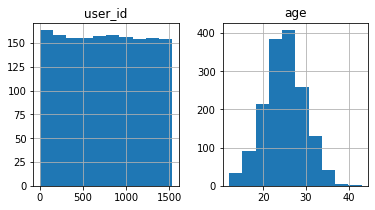

In [11]:
users_go.hist(figsize=(6, 3))
plt.show()

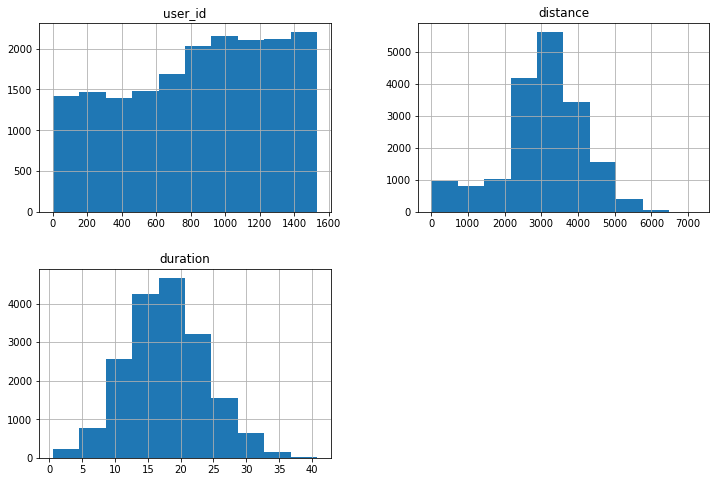

In [12]:
rides_go.hist(figsize=(12, 8))
plt.show()

Вывод: users_go содержит около 1500 строчек, rides_go чуть более 18 тысяч. В  датафрейме subscriptions_go 2 записи, пропуски отсутствуют, явных дубликатов не содержатся. 

#### Шаг 2. Предобработка данных

In [13]:
#анализ пропущенных значений
users_go.isna().sum().to_frame()

,0
user_id,0
name,0
age,0
city,0
subscription_type,0


In [14]:
rides_go.isna().sum().to_frame()

,0
user_id,0
distance,0
duration,0
date,0


In [15]:
subscriptions_go.isna().sum().to_frame()

,0
subscription_type,0
minute_price,0
start_ride_price,0
subscription_fee,0


In [16]:
rides_go['date'] = pd.to_datetime(rides_go['date'])

In [17]:
rides_go['month'] = rides_go['date'].dt.month

In [18]:
rides_go['month'].sort_values().min()

1

In [19]:
rides_go['duration'] = np.ceil(rides_go['duration']).astype('int')

In [20]:
rides_go.columns

Index(['user_id', 'distance', 'duration', 'date', 'month'], dtype='object')

In [21]:
#поиск дубликатов в трех датафреймах
print(rides_go.duplicated().sum())

0


In [22]:
print(users_go.duplicated().sum())

31


In [23]:
#удаление дубликатов
users_go.drop_duplicates(inplace=True)

In [24]:
print(users_go.duplicated().sum())

0


In [25]:
print(subscriptions_go.duplicated().sum())

0


Во время проведения предобработки данных:

1.Удалили дубликаты в данных riders_go

2.Округлили duration в соответствии с уточненными данными (п. 5.2) и перевели в int

3.Привели столбец date к типу datetime64.

4.Создали столбец month с номером месяца из date

5.Датафрейм subscriptions_go не трогали. 
 

#### Шаг 3. Исследовательский анализ данных

#####  Частота встречаемости городов

In [26]:
print(users_go['city'].value_counts())

Пятигорск         219
Екатеринбург      204
Ростов-на-Дону    198
Краснодар         193
Сочи              189
Омск              183
Тюмень            180
Москва            168
Name: city, dtype: int64


In [27]:
city_counts = users_go['city'].value_counts()

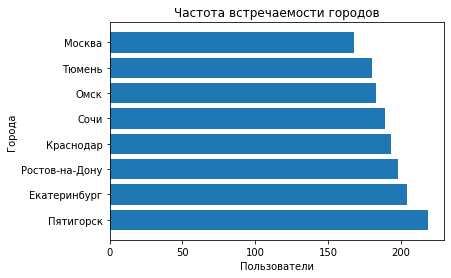

In [28]:
plt.barh(city_counts.index, city_counts.values)
plt.xlabel('Пользователи')
plt.ylabel('Города')
plt.title('Частота встречаемости городов')
plt.show()

Больше всего пользователей в Пятигорске и Екатеринбурге, меньше всего в Москве.

##### Распрстранение подписки на сервис 

<AxesSubplot:ylabel='Процентр подписок у пользователей'>

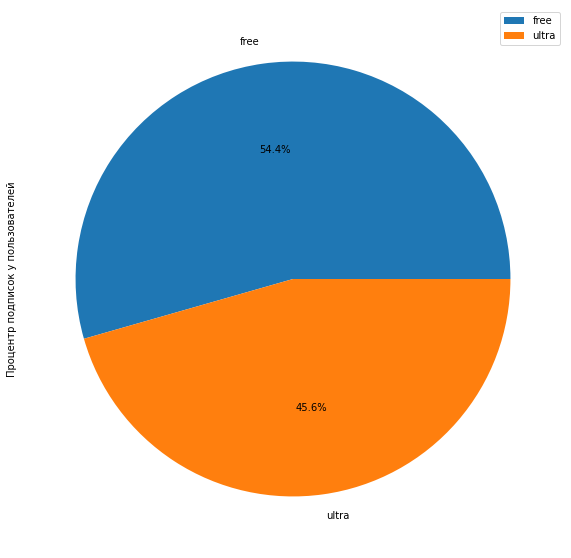

In [29]:
users_go.pivot_table(values='user_id', index='subscription_type', aggfunc='count')\
.plot.pie(y='user_id',figsize=(10,10),\
          label='Процентр подписок у пользователей', autopct='%1.1f%%')


Пользоватлей без подписки - 54,4%, с подпиской 45,6%

##### Возраст пользователей

In [30]:
users_go['age'].describe()

count    1534.000000
mean       24.903520
std         4.572367
min        12.000000
25%        22.000000
50%        25.000000
75%        28.000000
max        43.000000
Name: age, dtype: float64

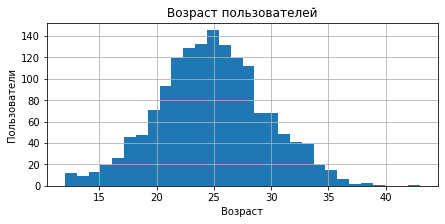

In [31]:
users_go['age'].plot(kind = 'hist', grid=True, figsize = (7,3), bins = 30)
plt.title('Возраст пользователей')
plt.xlabel('Возраст')
plt.ylabel('Пользователи')
plt.show()

Средний возраст пользоателей составляет примерно 25 лет. 

#####  Расстояние за 1 поездку.

In [32]:
rides_go['distance'].describe()

count    18068.000000
mean      3070.659976
std       1116.831209
min          0.855683
25%       2543.226360
50%       3133.609994
75%       3776.222735
max       7211.007745
Name: distance, dtype: float64

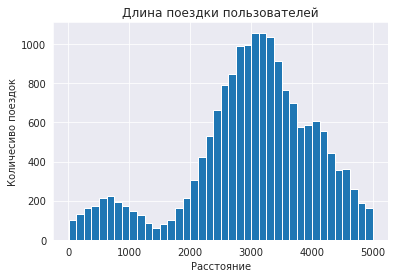

In [33]:
sns.set_style("darkgrid")
plt.hist(rides_go['distance'], bins=40, range=(2,5000))
plt.title('Длина поездки пользователей')
plt.xlabel('Расстояние')
plt.ylabel('Количесиво поездок')
plt.show()

Медиана поезкдок примерно 3000-3100.

##### Длительность поездки

In [34]:
rides_go['duration'].describe()

count    18068.000000
mean        18.303520
std          6.094928
min          1.000000
25%         14.000000
50%         18.000000
75%         22.000000
max         41.000000
Name: duration, dtype: float64

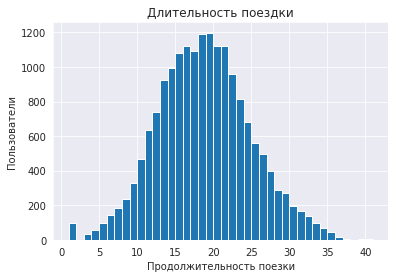

In [35]:
sns.set_style("darkgrid")
plt.hist(rides_go['duration'], bins=40, range=(1,41))
plt.title('Длительность поездки')
plt.xlabel('Продолжительность поезки')
plt.ylabel('Пользователи')
plt.show()

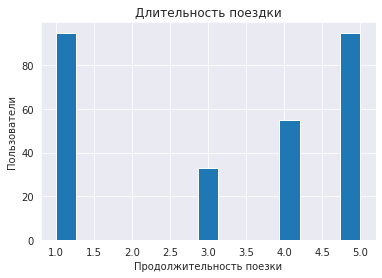

In [36]:
sns.set_style("darkgrid")
plt.hist(rides_go['duration'], bins=15, range=(1,5))
plt.title('Длительность поездки')
plt.xlabel('Продолжительность поезки')
plt.ylabel('Пользователи')
plt.show()

<AxesSubplot:>

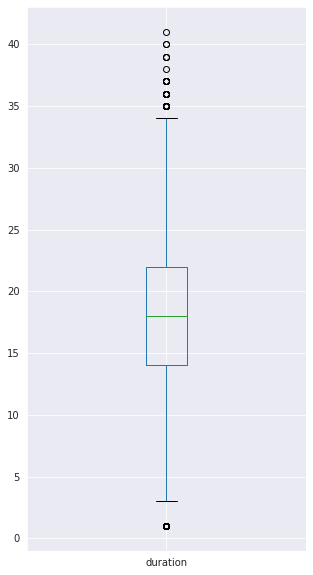

In [50]:
rides_go.boxplot('duration', figsize=(5, 10))

Средняя продолжительность поездки составляет 18-20 минут. На диаграмме также можно наблюдать чуть больше 80  поездок блительностью 1 минуту. Возможно, это аномалия. 

Вывод: Больше всего пользоватеелй в Пятигорске,Екатеринбурге и Ростове-на-Дону. Количество пользователей без подписки чуть больше 50%, с поодпиской 45%. Средний возраст "самокатччика" составляет 24-25 лет. Средняя длитльность поздки - 3 км, а медиана поездок приходится на 18-20 минут.

#### Шаг 4. Объединение данных

##### Объединение данных о пользователе и подписке в один датасеn 

In [68]:
print('Размер датасета users_go:', users_go.shape)

Размер датасета users_go: (1534, 5)


In [69]:
print('Размер датасета rides_go:', rides_go.shape)

Размер датасета rides_go: (18068, 5)


In [70]:
print('Размер датасета subscriptions_go:', subscriptions_go.shape)

Размер датасета subscriptions_go: (2, 4)


<div class="alert alert-info"> <b> </b> Исправила, надеюсь что правильно поняла.</div>

In [71]:
merged_df = users_go.merge(rides_go, on='user_id',how='inner') \
                .merge(subscriptions_go, on='subscription_type', how='inner')

In [72]:
display(merged_df)

,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
0,1,Кира,22,Тюмень,ultra,4409.919140,26,2021-01-01,1,6,0,199
1,1,Кира,22,Тюмень,ultra,2617.592153,16,2021-01-18,1,6,0,199
2,1,Кира,22,Тюмень,ultra,754.159807,7,2021-04-20,4,6,0,199
3,1,Кира,22,Тюмень,ultra,2694.783254,19,2021-08-11,8,6,0,199
4,1,Кира,22,Тюмень,ultra,4028.687306,27,2021-08-28,8,6,0,199
...,...,...,...,...,...,...,...,...,...,...,...,...
18063,1534,Альберт,25,Краснодар,free,3781.098080,20,2021-11-04,11,8,50,0
18064,1534,Альберт,25,Краснодар,free,2840.423057,22,2021-11-16,11,8,50,0
18065,1534,Альберт,25,Краснодар,free,3826.185507,19,2021-11-18,11,8,50,0
18066,1534,Альберт,25,Краснодар,free,2902.308661,17,2021-11-27,11,8,50,0


In [73]:
print('Размер датасета merged_df:', merged_df.shape)

Размер датасета merged_df: (18068, 12)


##### Создание двух датафреймов с данными пользователей с подписой и без

In [74]:
users_without_subscription = merged_df[merged_df['subscription_type'] == 'free']
display(users_without_subscription)

,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
6500,700,Айдар,22,Омск,free,2515.690719,15,2021-01-02,1,8,50,0
6501,700,Айдар,22,Омск,free,846.932642,17,2021-02-01,2,8,50,0
6502,700,Айдар,22,Омск,free,4004.434142,21,2021-02-04,2,8,50,0
6503,700,Айдар,22,Омск,free,1205.911290,10,2021-02-10,2,8,50,0
6504,700,Айдар,22,Омск,free,3047.379435,18,2021-02-14,2,8,50,0
...,...,...,...,...,...,...,...,...,...,...,...,...
18063,1534,Альберт,25,Краснодар,free,3781.098080,20,2021-11-04,11,8,50,0
18064,1534,Альберт,25,Краснодар,free,2840.423057,22,2021-11-16,11,8,50,0
18065,1534,Альберт,25,Краснодар,free,3826.185507,19,2021-11-18,11,8,50,0
18066,1534,Альберт,25,Краснодар,free,2902.308661,17,2021-11-27,11,8,50,0


In [75]:
users_with_subscription = merged_df[merged_df['subscription_type'] == 'ultra']
display(users_with_subscription)

,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
0,1,Кира,22,Тюмень,ultra,4409.919140,26,2021-01-01,1,6,0,199
1,1,Кира,22,Тюмень,ultra,2617.592153,16,2021-01-18,1,6,0,199
2,1,Кира,22,Тюмень,ultra,754.159807,7,2021-04-20,4,6,0,199
3,1,Кира,22,Тюмень,ultra,2694.783254,19,2021-08-11,8,6,0,199
4,1,Кира,22,Тюмень,ultra,4028.687306,27,2021-08-28,8,6,0,199
...,...,...,...,...,...,...,...,...,...,...,...,...
6495,699,Оксана,22,Москва,ultra,3973.046497,25,2021-08-29,8,6,0,199
6496,699,Оксана,22,Москва,ultra,3288.702563,16,2021-09-12,9,6,0,199
6497,699,Оксана,22,Москва,ultra,3076.159348,15,2021-09-26,9,6,0,199
6498,699,Оксана,22,Москва,ultra,4707.845501,16,2021-10-17,10,6,0,199


##### Информация о расстоянии и времени

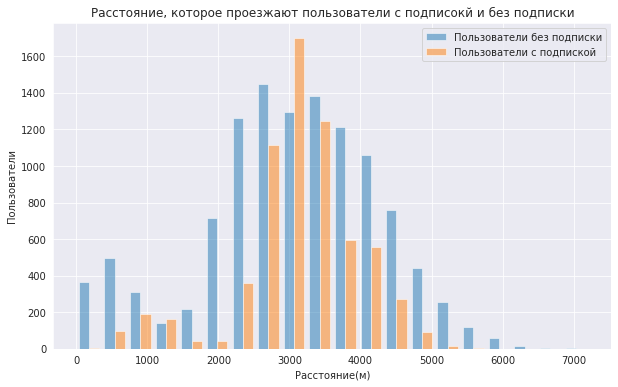

In [76]:
plt.figure(figsize=(10,6))

plt.hist([users_without_subscription['distance'],\
          users_with_subscription['distance']],\
         bins=20, alpha=0.5,\
         label=['Пользователи без подписки', 'Пользователи с подпиской'])
plt.xlabel('Расстояние(м)')
plt.ylabel('Пользователи')
plt.title('Расстояние, которое проезжают пользователи с подписокй и без подписки')
plt.legend()
plt.show()

Вывод: Пользователи с подпиской делают чуть более длинные поездки. У пользователей с подпиской мало очень коротких по расстоянию поездок.

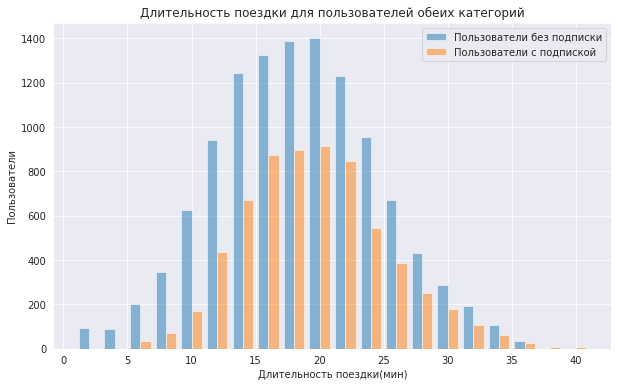

In [42]:
plt.figure(figsize=(10,6))

plt.hist([users_without_subscription['duration'], \
          users_with_subscription['duration']], \
         bins=20, alpha=0.5,\
         label=['Пользователи без подписки', 'Пользователи с подпиской'])
plt.xlabel('Длительность поездки(мин)')
plt.ylabel('Пользователи')
plt.title('Длительность поездки для пользователей обеих категорий')
plt.legend()
plt.show()

Вывод: пользователи без подписки делают чуть более долгие поездки. Также у пользователей без подпиской чуть больше коотких по длительности поездок, чем у пользователей с подпиской. 

#### Шаг 5. Подсчёт выручки

<div class="alert alert-block alert-warning">📝
    

__Комментарий от ревьюера №1__
    
Нет проверки на пропуски в сводной таблице перед расчетом выручки

##### Создайте датафрейм с агрегированными данными о поездках на основе датафрейма с объединёнными данными

In [43]:
aggregated_data = merged_df.pivot_table(
    index = ['user_id', 'month'],
    values = ['distance', 
        'duration', 
        'minute_price', 
        'start_ride_price', 
        'subscription_fee',
        'subscription_type'],
    aggfunc = {
        'distance': {'count', 'sum'},
        'duration': 'sum',
        'minute_price': 'mean',
        'start_ride_price': 'mean',
        'subscription_fee': 'mean',
        'subscription_type': 'first'
    }
)

aggregated_data.columns = [
    'count', 'distance', 
    'duration', 
    'minute_price',
    'start_ride_price', 
    'subscription_fee',
    'subscription_type'
]

In [44]:
aggregated_data.head()

count     distance  duration  minute_price  start_ride_price  \
user_id month                                                                 
1       1          2  7027.511294        42             6                 0   
        4          1   754.159807         7             6                 0   
        8          2  6723.470560        46             6                 0   
        10         2  5809.911100        32             6                 0   
        11         3  7003.499363        56             6                 0   

               subscription_fee subscription_type  
user_id month                                      
1       1                   199             ultra  
        4                   199             ultra  
        8                   199             ultra  
        10                  199             ultra  
        11                  199             ultra

 #####  В этот же датафрейм добавьте столбец с помесячной выручкой, которую принёс каждый пользователь. 


In [45]:
#Помесячная выручка считается по формуле: стоимость старта поездки 
#×  количество поездок + стоимость одной минуты поездки 
#× общая продолжительность всех поездок в минутах + стоимость подписки.

In [46]:
aggregated_data['month_income'] = (
    aggregated_data['start_ride_price']*aggregated_data['count']+
        aggregated_data['minute_price']*aggregated_data['duration']+
            aggregated_data['subscription_fee'])

In [47]:
aggregated_data.head(10)

count      distance  duration  minute_price  start_ride_price  \
user_id month                                                                  
1       1          2   7027.511294        42             6                 0   
        4          1    754.159807         7             6                 0   
        8          2   6723.470560        46             6                 0   
        10         2   5809.911100        32             6                 0   
        11         3   7003.499363        56             6                 0   
        12         2   6751.629942        28             6                 0   
2       3          3  10187.723006        63             6                 0   
        4          2   6164.381824        40             6                 0   
        6          1   3255.338202        14             6                 0   
        7          2   6780.722964        48             6                 0   

               subscription_fee subscription_type  month_income  
user_id month                                                    
1       1                   199             ultra           451  
        4                   199             ultra           241  
        8                   199             ultra           475  
        10                  199             ultra           391  
        11                  199             ultra           535  
        12                  199             ultra           367  
2       3                   199             ultra           577  
        4                   199             ultra           439  
        6                   199             ultra           283  
        7                   199             ultra           487

In [48]:
print('Помесячная выручка составляет:', aggregated_data['month_income'].sum(), 'руб.')

Помесячная выручка составляет: 3878641 руб.


#### Шаг 6. Проверка гипотез

##### Тратят ли пользователи с подпиской больше времени на поезкди?  Если да, то пользователи с подпиской могут быть «выгоднее» для компании. Проверьте гипотезу. Используйте исходные данные о продолжительности каждой сессии — отдельно для подписчиков и тех, у кого нет подписки. 

Нулевая гипотеза:Продолжительность поезкдок с подпиской одинакова или меньше Продолжительности поезкди пользователей без подписки.
Альтернативная гипотеза: Пользователи с подпиской ездят на самокатах дольше.

In [46]:
first_hyp = st.ttest_ind(
    users_with_subscription['duration'], 
    users_without_subscription['duration'], 
    alternative='greater')

print(first_hyp.pvalue)

alpha = 0.05
if first_hyp.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

2.4959453720736625e-34
Отвергаем нулевую гипотезу


Таким образом, выходит что средняя продолжительность значительно отличается между пользователями с подпиской и без нее.
Пользователи с подпиской имеют значительно отличающуюся среднюю продолжительность поезкдок по сравнению с пользователями без подписки.

##### Расстояние одной поездки в 3130 метров — оптимальное с точки зрения износа самоката. Можно ли сказать, что расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров? Проверьте гипотезу и сделайте выводы.

Нулевая гипотеза: Среднее расстояние поездки пользователей с подпиской равно или меньше 3130 метров. Альтернативная гипотеза : Срднее расстоние поездки пользователей с подпикой больше 3130.

<div class="alert alert-info"> <b> </b> Исправила.Сделала с помощью другого теста.  </div>

In [66]:
distance = 3130
alpha = 0.05

second_hyp = st.ttest_1samp(
    users_with_subscription['distance'],distance, 
    alternative='greater')

print(second_hyp.pvalue)

if second_hyp.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

0.9195368847849785
Не получилось отвергнуть нулевую гипотезу


Вывод: p-значение больше 0,05, нулевая гипотеза не отвергается.  Результаты не дают оснований для вывода, что среднее расстояние проезда пользователей с подпиской превышает 3130 метров.

##### Проверяем гипотезу, будет ли поесячная выручка от пользователей с подпиской выше, чем у пользователей без подписки. 

In [48]:
alpha = 0.05

third_hyp = st.ttest_ind(
    aggregated_data[aggregated_data['subscription_type'] == 'ultra']['month_income'], 
    aggregated_data[aggregated_data['subscription_type'] == 'free']['month_income'], 
    alternative='greater')

print(third_hyp.pvalue)

if third_hyp.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

1.8850394384715216e-31
Отвергаем нулевую гипотезу


Мы отвергаем нулевую гипотезу и можно считать, что средняя помесячная выручка у пользователей с подпиской действительно выше, чем у пользователей без подписки.

##### Представьте такую ситуацию: техническая команда сервиса обновила сервера, с которыми взаимодействует мобильное приложение. Она надеется, что из-за этого количество обращений в техподдержку значимо снизилось. Некоторый файл содержит для каждого пользователя данные о количестве обращений до обновления и после него. Какой тест вам понадобился бы для проверки этой гипотезы?

Для проверки гипотезы о том, что количество обращений в техподдержку значимо снизилось после обновления серверов нужно использовать двухвыборочный t-test  для зависимых выборок. В этом случае необхрдимо сравниваются две выборки данных (количество обращений до и после обновления) для одних и тех же пользователей. Метод из библиотеки : scipy.stats.ttest_rel()



Во время проведения предобработки данных: удалили дубликаты в данных riders_go; округлили duration в соответствии с уточненными данными (п. 5.2) и перевели в int; привели столбец date к типу datetime6; создали столбец month с номером месяца из date; датафрейм subscriptions_go не трогали. 

Больше всего пользоватеелй в Пятигорске,Екатеринбурге и Ростове-на-Дону. Количество пользователей без подписки чуть больше 50%, с поодпиской 45%. Средний возраст "самокатччика" составляет 24-25 лет. Средняя длитльность поздки - 3 км, а медиана поездок приходится на 18-20 минут. Помесячная выручка сервиса составляет: 3878641 руб.

Касаемо гипотез, что средняя продолжительность значительно отличается между пользователями с подпиской и без нее. Пользователи с подпиской имеют значительно отличающуюся среднюю продолжительность поезкдок по сравнению с пользователями без подписки. Результаты не дают оснований для вывода, что среднее расстояние проезда пользователей с подпиской превышает 3130 метров. Можно считать, что средняя помесячная выручка у пользователей с подпиской действительно выше, чем у пользователей без подписки.

Следует развивать подписку для пользователей, так как это выгоднее для компании.

#### Шаг 7. Распределения

Шаг 1. Загрузка данных
1.1 Считайте CSV-файлы с данными с помощью библиотеки pandas и сохраните их в датафреймы. 

Пути к файлам:
/datasets/users_go.csv


/datasets/rides_go.csv

/datasets/subscriptions_go.csv

1.2 Выведите первые строки каждого набора данных. Изучите общую информацию о каждом датафрейме.


Шаг 2. Предобработка данных

2.1 Приведите столбец date к типу даты pandas.
2.2 Создайте новый столбец с номером месяца на основе столбца date.
2.3 Проверьте наличие пропущенных значений и дубликатов в датафреймах. Обработайте их, если такие значения присутствуют.


Шаг 3. Исследовательский анализ данных

Опишите и визуализируйте общую информацию о пользователях и поездках:
3.1 частота встречаемости городов;
3.2 соотношение пользователей с подпиской и без подписки;
3.3 возраст пользователей;
3.4 расстояние, которое пользователь преодолел за одну поездку;
3.5 продолжительность поездок.


Шаг 4. Объединение данных

4.1 Объедините данные о пользователях, поездках и подписках в один датафрейм. Для этого воспользуйтесь методом merge().
4.2 Создайте ещё два датафрейма из датафрейма, созданного на этапе 4.1:
c данными о пользователях без подписки;
с данными о пользователях с подпиской.
4.3 Визуализируйте информацию о расстоянии и времени поездок для пользователей обеих категорий.


Шаг 5. Подсчёт выручки

5.1 Создайте датафрейм с агрегированными данными о поездках на основе датафрейма с объединёнными данными из шага 4: найдите суммарное расстояние, количество поездок и суммарное время для каждого пользователя за каждый месяц.
5.2 В этот же датафрейм добавьте столбец с помесячной выручкой, которую принёс каждый пользователь. Для этого обратитесь к информации об условиях оплаты для подписчиков и тех, у кого нет подписки. Продолжительность каждой поездки в каждой строке исходного датафрейма для подсчёта стоимости округляется до следующего целого числа: например, значения 25.3,25.5 и 26.0 должны быть преобразованы к  26.
Подсказка
rides_df['duration'] = np.ceil(rides_df['duration']) 

Шаг 6. Проверка гипотез


Продакт-менеджеры сервиса хотят увеличить количество пользователей с подпиской. Для этого они будут проводить различные акции, но сначала нужно выяснить несколько важных моментов.
6.1 Важно понять, тратят ли пользователи с подпиской больше времени на поездки? Если да, то пользователи с подпиской могут быть «выгоднее» для компании. Проверьте гипотезу. Используйте исходные данные о продолжительности каждой сессии — отдельно для подписчиков и тех, у кого нет подписки.
6.2 Расстояние одной поездки в 
3130
3130 метров — оптимальное с точки зрения износа самоката. Можно ли сказать, что расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 
3130
3130 метров? Проверьте гипотезу и сделайте выводы.
6.3. Проверьте гипотезу о том, будет ли помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки. Сделайте вывод.
6.4. Представьте такую ситуацию: техническая команда сервиса обновила сервера, с которыми взаимодействует мобильное приложение. Она надеется, что из-за этого количество обращений в техподдержку значимо снизилось. Некоторый файл содержит для каждого пользователя данные о количестве обращений до обновления и после него. Какой тест вам понадобился бы для проверки этой гипотезы?